Epoch 1/100


C:\Users\Sanika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0097 - loss: 1.1227 - val_accuracy: 0.0273 - val_loss: 0.7799
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0446 - loss: 0.7269 - val_accuracy: 0.0627 - val_loss: 0.7110
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0659 - loss: 0.6999 - val_accuracy: 0.0907 - val_loss: 0.6905
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0916 - loss: 0.6698 - val_accuracy: 0.0900 - val_loss: 0.6797
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0931 - loss: 0.6701 - val_accuracy: 0.1007 - val_loss: 0.6721
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1047 - loss: 0.6942 - val_accuracy: 0.1113 - val_loss: 0.6662
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1056 - loss: 0.6514 - val_accuracy: 0.1253 - val_loss: 0.6614
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 0.6484 - val_accuracy: 0.1393 - val_loss: 0.6

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2242 - loss: 0.6263 - val_accuracy: 0.2300 - val_loss: 0.6362
Epoch 52/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2225 - loss: 0.6328 - val_accuracy: 0.2180 - val_loss: 0.6360
Epoch 53/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 0.6136 - val_accuracy: 0.2227 - val_loss: 0.6359
Epoch 54/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 0.6562 - val_accuracy: 0.2213 - val_loss: 0.6358
Epoch 55/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2437 - loss: 0.6387 - val_accuracy: 0.2273 - val_loss: 0.6357
Epoch 56/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2313 - loss: 0.6289 - val_accuracy: 0.2273 - val_loss: 0.6355
Epoch 57/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2397 - loss: 0.6057 - val_accuracy: 0.2273 - val_loss: 0.6354
Epoch 58/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 0.5995 - val_accuracy: 0.2307 - val_lo

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2797 - loss: 0.6191
Test Loss: [0.631919264793396, 0.2773333191871643]
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[575  47]
 [850  28]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.40      0.92      0.56       622
         1.0       0.37      0.03      0.06       878

    accuracy                           0.40      1500
   macro avg       0.39      0.48      0.31      1500
weighted avg       0.39      0.40      0.27      1500

Number of outliers: 75
Number of anomalies: 28


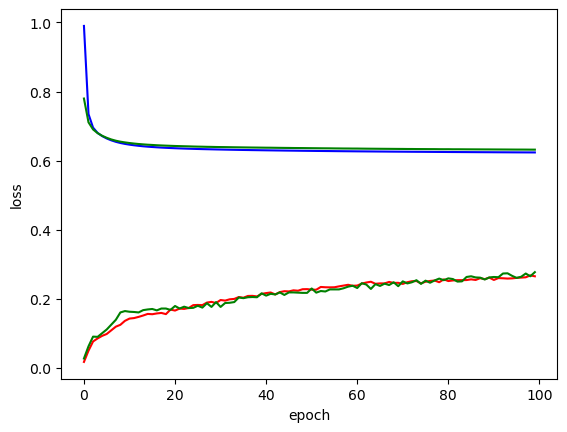

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\Sanika\Desktop\Untitled Folder\ecg.csv", header = None)
df

X = df.drop([140], axis = 1)
y = df[140]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = Sequential([Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))])
decoder = Sequential([Dense(X_train.shape[1], activation = 'sigmoid')])

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

r = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_data= (X_test, X_test))

r.history.keys()

plt.plot(r.history['loss'], label = 'loss', color = 'blue')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(r.history['accuracy'], label = 'acc', color = 'red')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend

loss = autoencoder.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

decoded_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers] == 1)

print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv(r"C:\Users\Sanika\Desktop\Untitled Folder\ecg.csv",header=None)

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [9]:
x=data.drop(140,axis=1)
y=data[140]

In [10]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape

(3498, 140)

In [20]:
encoder= Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],))
])

decoder= Sequential([
    Dense((x_train.shape[1]),activation='softmax')
])

In [21]:
autoencoder= Sequential([encoder,decoder])

In [27]:
autoencoder.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['mean_squared_error'])

In [28]:
autoencoder.fit(x_train,x_train,epochs=100,batch_size=64,validation_data=(x_test,x_test))

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: -116.9884 - mean_squared_error: 0.9887 - val_loss: -956.2291 - val_mean_squared_error: 0.9862
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1746.9635 - mean_squared_error: 0.9859 - val_loss: -5255.7549 - val_mean_squared_error: 0.9864
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -7167.7314 - mean_squared_error: 0.9866 - val_loss: -14363.5811 - val_mean_squared_error: 0.9866
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -17545.0898 - mean_squared_error: 0.9870 - val_loss: -28405.3633 - val_mean_squared_error: 0.9874
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -33009.2852 - mean_squared_error: 0.9873 - val_loss: -47327.8086 - val_mean_squared_error: 0.9873
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -52819.0312 - mean_squared_error: 0.9874 - val_loss: -70867.0781 - val_mean_squared_error: 0.9879
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -77796

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -3368207.7500 - mean_squared_error: 0.9878 - val_loss: -3430440.2500 - val_mean_squared_error: 0.9885
Epoch 44/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -3522962.5000 - mean_squared_error: 0.9877 - val_loss: -3576167.5000 - val_mean_squared_error: 0.9884
Epoch 45/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -3611316.2500 - mean_squared_error: 0.9879 - val_loss: -3723393.7500 - val_mean_squared_error: 0.9867
Epoch 46/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -3819901.2500 - mean_squared_error: 0.9878 - val_loss: -3874311.7500 - val_mean_squared_error: 0.9872
Epoch 47/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -3887497.5000 - mean_squared_error: 0.9881 - val_loss: -4026386.0000 - val_mean_squared_error: 0.9896
Epoch 48/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -4036407.7500 - mean_squared_error: 0.9882 - val_loss: -4180979.2500 - val_mean_squared_error: 0.9880
Epoch 49/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 85/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -11200189.0000 - mean_squared_error: 0.9871 - val_loss: -11428803.0000 - val_mean_squared_error: 0.9878
Epoch 86/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -11890934.0000 - mean_squared_error: 0.9874 - val_loss: -11663981.0000 - val_mean_squared_error: 0.9877
Epoch 87/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -11903683.0000 - mean_squared_error: 0.9876 - val_loss: -11900068.0000 - val_mean_squared_error: 0.9866
Epoch 88/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -12055542.0000 - mean_squared_error: 0.9874 - val_loss: -12138121.0000 - val_mean_squared_error: 0.9867
Epoch 89/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -12492969.0000 - mean_squared_error: 0.9870 - val_loss: -12379300.0000 - val_mean_squared_error: 0.9879
Epoch 90/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -12411650.0000 - mean_squared_error: 0.9882 - val_loss: -12619944.0000 - val_mean_squared_error: 0.9865
Epoch 91/100
55/

In [29]:
predictions= autoencoder.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
mse= np.mean(np.square(predictions-x_test),axis=1)
threshold = np.percentile(mse, 95)
outliers= mse > threshold

In [38]:
num_outliers= np.sum(outliers)
num_anomalies= np.sum(y_test[outliers]==1)

In [39]:
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 20
